# **Counting The Objects Inside Created Zone**

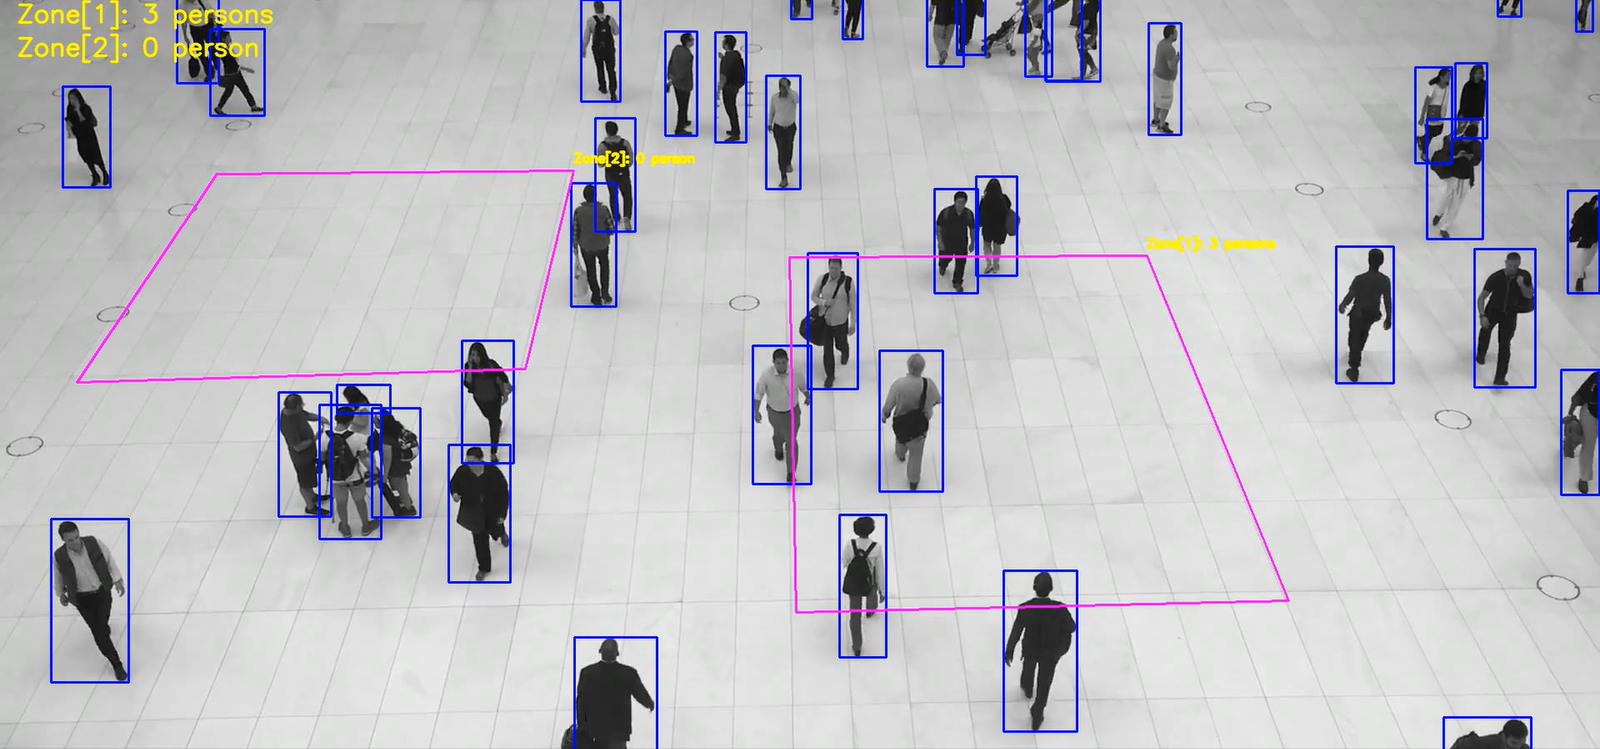

# Importing Libraries

In [1]:
import cv2
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


from sahi.utils.yolov8 import download_yolov8s_model
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from pathlib import Path
from IPython.display import Image


In [2]:
yolov8_model_path = "models/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

In [3]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cpu",  # or 'cuda:0'
)

In [4]:
cap = cv2.VideoCapture("cv.mp4")
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
size = (frame_width, frame_height)
color = (0,0,255) #red color
line_width = 2
radius = 10
rec=[]
point = []
i=-1
def click(event, x, y, flags, param):
    global point, pressed ,i
    if event == cv2.EVENT_LBUTTONDOWN:
        point.append([x,y])
        
result = cv2.VideoWriter('filename.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         20, size)
        
cv2.namedWindow("live video")
cv2.setMouseCallback("live video",click)
while cap.isOpened():
    success, frame = cap.read()
    if success:
        # SAHI module
        results = get_sliced_prediction(
            frame,
            detection_model,
            slice_height=500,
            slice_width=500,
            overlap_height_ratio=0.2,
            overlap_width_ratio=0.2
         ).to_coco_annotations()
        
        # Draw boxes
        center=[]
        for box in results:
            if box['category_name']=='person':
                x1=int(box['bbox'][0])
                y1=int(box['bbox'][1])
                x2=int(box['bbox'][2])+int(box['bbox'][0])
                y2=int(box['bbox'][3])+int(box['bbox'][1])
                cv2.rectangle(frame, (x1,y1), (x2,y2), (255,0,0), 2)
                center.append([(int((x2-x1)/2)+x1,int((y2-y1)/2)+y1)])
                
        
        
        
        #try:
        if rec:
            for i, rect in enumerate(rec):
                num=0
                cv2.polylines(frame, rect, True, (255, 0, 255), 2)
                polygon = Polygon(rect[0])
                for c in center:
                    point1=Point(c)
                    if polygon.contains(point1):
                        num+=1
                if num>1:
                    person="persons"
                else:
                    person="person"
                cv2.putText(frame, f'Zone[{i+1}]: {num} {person}', (20,(i*40)+30),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

                cv2.putText(frame, f'Zone[{i+1}]: {num} {person}', (rec[i][0][list(rec[i][0][:,1]).index(min(rec[i][0][:,1]))][0] ,  min(rec[i][0][:,1])-10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2, cv2.LINE_AA)

        try:
            cv2.circle(frame, point[-1], 1, color, line_width)
            if len(point)>=2 and (len(point)-1)%4!=0:
                cv2.polylines(frame, [np.array(point)], False, (255, 0, 255), 2)
            if len(point)==4:
                cv2.polylines(frame, [np.array(point)], True, (255, 0, 255), 2)
                rec.append([np.array(point)])
                point=[]
                
        except:
            pass
        cv2.imshow("live video",frame)
        result.write(frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        # Break the loop if the end of the video is reached
        break

        
        
cap.release()
result.release()
cv2.destroyAllWindows()

Performing prediction on 15 number of slices.
Performing prediction on 15 number of slices.
Performing prediction on 15 number of slices.
Performing prediction on 15 number of slices.
Performing prediction on 15 number of slices.
